In [1]:
# Isso é um comentário 

In [2]:
# pandas e plotly
# Importando Bibliotecas
# Por convenção chama-se o pandas de pd
import pandas as pd
%matplotlib inline

# Importando também o Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [80]:
df = pd.read_csv('mapas-culturais-dados-exportadosCSV.csv')
# Exibir as primeiras linhas do DataFrame
# Por padrão o .head mostra 5 primeiras linhas, mas é possível determinar o número de linhas.
df.head(2)

,Descri??o Leg?vel do Hor?rio,Id,Nome,Descri??o Curta,Descri??o Longa,Data de Cria??o,Data de Atualiza??o,Publicado por,Projeto,Classifica??o Et?ria,...,Repete-Sexta,Repete-S?bado,Espa?o,CEP,Logradouro,N?mero,Complemento,Bairro,Munic?pio,Estado
0,Toda quinta-feira de 28 de fevereiro a 19 de d...,577,Estreia na Biblioteca,Quinta-feira ? dia de estreias em todos os cin...,Quinta-feira ? dia de estreias em todos os cin...,2017-08-31 15:21:28,2019-02-27 17:39:24,Guilherme Yung Wing Li,EstreianaBiblioteca,Livre,...,NaN,NaN,Biblioteca Pública Municipal Professor Pedro V...,Avenida Rio de Janeiro,413,PR,NaN,NaN,NaN,NaN
1,Diariamente de 1 a 29 de mar?o de 2019 ?s 07:30,582,Exposição de Poesias Ilustradas de Valdenir Te...,Exposi??o de Poesias Ilustradas de Valdenir Te...,NaN,2017-09-05 11:04:50,2019-03-06 13:23:53,Guilherme Yung Wing Li,NaN,Livre,...,Sim,NaN,Biblioteca Pública Municipal Professor Pedro V...,Avenida Rio de Janeiro,413,PR,NaN,NaN,NaN,NaN


In [81]:
# Carregar o arquivo csv
# Pandas vai converter o arquivo em um DataFrame
# Por convenção chama-se o DataFrame de df 

# Se o modo de separação no arquivo usar ";", é preciso informar o separador
# O separador, em arquivos csv, podem ser vírgula, ponto e vírgula, espaço ou tab
# Se não informar, ele interpretará a vígula como sendo o separador
# Em caso de erro de encoding: se for arquivo vindo do excel, provavelmente está codificado como cp1252.

# Vamos importar apenas algumas colunas do arquivo
# Isso se faz visionando o arquivo e identificando as colunas de interesse
# 3 - Hospital. 6 - Município, 7 - Complexidade, 8 - Carater Atendimento, 
# 12 - Sub Grupo Procedimento, 14 - Procedimento
# o "usecols" diz qual colunas ele deve usar.

df_filtrocolunas = pd.read_csv('mapas-culturais-dados-exportadosCSV.csv', 
                 usecols=[2, 9, 12, 16, 26, 29, 39, 40, 41])

# Trocar o nome das colunas
df_filtrocolunas.columns=['Atividade', 'Classificação Indicativa', 'Linguagem', 'Preço', 
           'Data inicial', 'Frequência', 'Local', 'Endereço', 'Número']
df_filtrocolunas.head()

,Atividade,Classificação Indicativa,Linguagem,Preço,Data inicial,Frequência,Local,Endereço,Número
0,Estreia na Biblioteca,Livre,Livro e Literatura,gratuito,2019-02-28,Semanal,Biblioteca Pública Municipal Professor Pedro V...,Avenida Rio de Janeiro,413
1,Exposição de Poesias Ilustradas de Valdenir Te...,Livre,Livro e Literatura,gratuito,2019-03-01,Semanal,Biblioteca Pública Municipal Professor Pedro V...,Avenida Rio de Janeiro,413
2,Aulas de Hatha Yoga,12 anos,Curso ou Oficina,130,2019-01-15,Semanal,Vila TRIOLÉ Cultural,Rua Etienne Lenoir,155
3,Aulas de Hatha Yoga,12 anos,Curso ou Oficina,130,2019-01-15,Semanal,Vila TRIOLÉ Cultural,Rua Etienne Lenoir,155
4,"Círculo de debates sobre o livro ""Quarenta dia...",Livre,"Livro e Literatura, Palestra, Debate ou Encontro",gratuito,2019-05-06,Uma vez,Biblioteca Pública Municipal Professor Pedro V...,Avenida Rio de Janeiro,413


In [7]:
df_filtrocolunas.shape

(753, 9)

In [5]:
df_filtrocolunas.tail(2)

,Atividade,Classificação Indicativa,Linguagem,Preço,Data inicial,Frequência,Local,Endereço,Número
751,50 ANOS BANDA MARCIAL MARCELINO CHAMPAGNAT,Livre,M?sica Popular,Entrada Franca,2019-11-17,Uma vez,Cine Teatro Universitário Ouro Verde,R. Maranh?o,85
752,Arte-Transformação na Educação Infantil,Livre,"Exposi??o, Audiovisual",gratuito,2019-10-04,Diariamente,Vila TRIOLÉ Cultural,Rua Etienne Lenoir,155


In [56]:
df_filtrocolunas.sample(2)

,Atividade,Classificação Indicativa,Linguagem,Preço,Data inicial,Frequência,Local,Endereço,Número
217,Oficina Quizomba de Bumba-meu-Boi,Livre,"M?sica Popular, Artes Integradas, Cultura Ind?...",Gratuito,2019-05-04,Uma vez,Flapt!,Rua Lino Sachetin,498
32,BRISA - Saraus Artísticos,Livre,"Hip Hop, Curso ou Oficina, M?sica Popular, Pal...",Evento Gratuito,2019-03-22,Uma vez,Centro POP,Rua Dib Libos,s/n


In [6]:
# Quantas colunas no arquivo?
df_filtrocolunas.count()

Atividade                   753
Classificação Indicativa    753
Linguagem                   753
Preço                       700
Data inicial                753
Frequência                  695
Local                       747
Endereço                    720
Número                      715
dtype: int64

In [8]:
df_filtrocolunas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 9 columns):
Atividade                   753 non-null object
Classificação Indicativa    753 non-null object
Linguagem                   753 non-null object
Preço                       700 non-null object
Data inicial                753 non-null object
Frequência                  695 non-null object
Local                       747 non-null object
Endereço                    720 non-null object
Número                      715 non-null object
dtypes: object(9)
memory usage: 53.1+ KB


In [9]:
# Descreve as colunas numéricas
# describe serve muito para campos que são numéricos
df_filtrocolunas.describe()

,Atividade,Classificação Indicativa,Linguagem,Preço,Data inicial,Frequência,Local,Endereço,Número
count,753,753,753,700,753,695,747,720,715
unique,490,6,130,101,256,3,124,99,83
top,FILO 50+1 - MOSTRA NACIONAL DE ARTES CÊNICAS,Livre,Teatro,gratuito,2019-10-23,Uma vez,Vila TRIOLÉ Cultural,Rua Etienne Lenoir,155
freq,17,540,78,165,16,569,68,68,68


###### O que dá para entender do quadro acima:

753 atividades registradas na Plataforma Londrina Cultura (aconteceram em dias e/ou em horários diferentes), no período entre 01 de janeiro a 20 de novembro de 2019, sendo 490 atividades únicas.
São 124 locais, pois são 124 valores únicos para o item Local. 
No rol de atividades, foram registradas 06 tuipos distintos de Classificação Indicativa. 
São 03 tipos de frequência (uma vez, diariamente e semanal).
Foram registrados 130 tipos diferentes de linguagens (ver o erro de digitação).
101 preços diferentes.
256 dias diferentes (01jan19 a 20nov19 totalizam 323 dias)
99 vezes aconteceram atividades num mesmo endereço.
83 vezes num mesmo número (verificar se: em alguns casos o número do endereço não foi preenchido).

A atividade top é o FILO 50+1 - MOSTRA NACIONAL DE ARTES CÊNICAS, com 17 registros.
540 atividades programadas tinham clasificação livre
A linguagem top foi o Teatro, com 78 registros.
Das 753 atividades, 165 foram gratuitas (tem que rever a questão das "conmtribui quanto quer, etc)
23out19 foi o dia com o maior número de atividades registradas: 16
569 atividades previram a frequência de "uma vez".
Vila Triolé Cultural é o local que recebeu o maior números das atividades registradas (68).



In [ ]:
# # Ser cientista de dados é tomar decisões
# Pois você pode encontrar dados ruins e aí vai ter que decidir
# Está faltando dados e aí terá que decidir. 
# Está faltando aqui 9 mil valores de bolsas integrais.
# Se eu precisar do dado terei que jogar fora 9 mil linhas 
# ou buscar esses dados que estão faltando.
# Dependendo da análise que se irá fazer, deéndendo dos valores que eu tenho, 
# a ausência de dados pode significar jogar uma linha fora, ou um dado fora, 
# ou então que eu vou ter mais trabalho ainda para buscar os dados que faltam 
# em algum outro lugar.

In [10]:
# Mostra os tipos de cada coluna do DataFrame
df_filtrocolunas.dtypes

Atividade                   object
Classificação Indicativa    object
Linguagem                   object
Preço                       object
Data inicial                object
Frequência                  object
Local                       object
Endereço                    object
Número                      object
dtype: object

In [11]:
# Printa somente a coluna apresentada como lista
# quando coloco colchetes estou fazendo uma seleção
df_filtrocolunas['Classificação Indicativa']

0        Livre
1        Livre
2      12 anos
3      12 anos
4        Livre
        ...   
748      Livre
749      Livre
750    10 anos
751      Livre
752      Livre
Name: Classificação Indicativa, Length: 753, dtype: object

In [17]:
# Listar os faixas de classificação indicativa presentes nos dados
df_filtrocolunas['Classificação Indicativa'].unique()

array(['Livre', '12 anos', '16 anos', '10 anos', '18 anos', '14 anos'],
      dtype=object)

In [83]:
# Quantas incidências existem em cada faixa de classificação indicativa
# Conta o número por valor dentro da coluna
df_filtrocolunas['Classificação Indicativa'].value_counts()

Livre      540
10 anos     55
18 anos     52
14 anos     44
16 anos     41
12 anos     21
Name: Classificação Indicativa, dtype: int64

In [89]:
df_filtrocolunas['Preço'].value_counts()

gratuito                                                        165
Gratuito                                                        160
0                                                                45
R$20,00 (R$10,00 meia)                                           19
R$ 20 e R$ 10                                                    17
                                                               ... 
25,00 ATÉ O DIA 12/08/2019 APÓS ESSA DATA PASSA PARA R$50,00      1
gratis - retirar convite 1h antes                                 1
Contribuição Livre                                                1
R$15 no local ou antecipados a R$10                               1
R$ 5,00                                                           1
Name: Preço, Length: 101, dtype: int64

In [88]:
# Qual o ingresso mais caro?
df_filtrocolunas[df_filtrocolunas['Preço'] == df_filtrocolunas['Preço'].max()]

TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
#df[df['mensalidade'] == df['mensalidade'].min()][['uf_busca', 'cidade_busca']]
# Se eu quiser ver apenas uma coluna, apenas de um colchete
# Se tiver duas, três colunas, 
# as colunas devem estar dentro de um colchete e haver um colchete de fora

In [ ]:
# Qual a mensalidade mais cara por UF?
# o groupby está agrupando, no caso, por unidade da federação
#df.groupby('uf_busca')['mensalidade'].max()

In [ ]:
# Qual a mensalidade mais barata por UF?
# o groupby está agrupando, no caso, por unidade da federação
#df.groupby('uf_busca')['mensalidade'].min()

In [ ]:
# Mostrar toos os dados dos cursos mais caros de cada UF
# idxmax faz busca por id
#df.loc[df.groupby('uf_busca')['mensalidade'].idxmax()]

In [ ]:
# mensalidades entre 500 e 1000
#df[(df['mensalidade'] > 500) & (df['mensalidade'] < 1000)]

In [19]:
# Listar os locais presentes nos dados
df_filtrocolunas["Local"].unique()

array(['Biblioteca Pública Municipal Professor Pedro Viriato Parigot de Souza',
       'Vila TRIOLÉ Cultural', 'Biblioteca Municipal Ramal Vila Nova',
       'Biblioteca Pública Municipal Lupércio Luppi', 'Biblioteca do CEU',
       'Biblioteca Eugênia Monfranati', 'Museu de Arte de Londrina',
       'VILA CULTURAL CEMITÉRIO DE AUTOMÓVEIS', 'Colégio Mãe de Deus',
       'Faculdade Teológica Sul Americana',
       'IFPR - Instituto Federal do Paraná Campus Londrina',
       'Biblioteca Central da UEL', nan, 'CMEI Valéria Veronesi',
       'Calçadão', 'Concha Acústica', 'Escola Municipal Hikoma Udihara',
       'Escola Municipal José Garcia Villar',
       'Associação Solidariedade Sempre ', 'CMEI Kalin Youssef Youssef',
       'Centro POP', 'Casa do Bom Samaritano',
       'Vila Cultural Alma Brasil', 'Flapt!',
       'Centro Cultural SESI - AML', 'Museu Histórico de Londrina',
       'Sesc Londrina Cadeião Cultural', 'SESC LONDRINA',
       'Biblioteca Pública Infantil de Londrina', 'U

In [13]:
# Contar por Locais
df_filtrocolunas["Local"].value_counts()

Vila TRIOLÉ Cultural                                                     68
Biblioteca Pública Municipal Professor Pedro Viriato Parigot de Souza    59
Centro Cultural SESI - AML                                               42
VILA CULTURAL CEMITÉRIO DE AUTOMÓVEIS                                    37
Cine Teatro Universitário Ouro Verde                                     36
                                                                         ..
Conservatório Das Artes Londrinense                                       1
Plataformas Digitais de Música                                            1
Residencial Flores do Campo                                               1
Colegio Estadual Professora Roseli Piotto Roehrig                         1
Colégio Estadual do Campo Maria Aparecida Rosignol Franciosi              1
Name: Local, Length: 124, dtype: int64

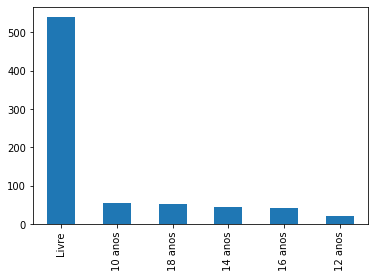

In [36]:
# Mostrar dados em um gráfico
# O Matplotlib não será importado, neste caso, pois já está contido no Pandas
# É preciso informar que se quer visualizar o gráfico dentro do próprio notebook
%matplotlib inline

# Mostrar a Classificação Indicativa em um gráfico de barras
df_filtrocolunas["Classificação Indicativa"].value_counts().plot.bar()

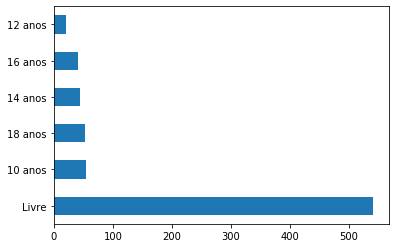

In [37]:
# Plotar o gráfico de barras horizontal por Classificação Indicativa
df_filtrocolunas['Classificação Indicativa'].value_counts().plot.barh()

In [42]:
# Dentro de um conjunto maior de dados, é possível tratar um conjunto menor.
# Vamos criar um subconjunto dos dados originais
# Cria-se um outro DataFrame só para mexer com determinado subconjunto
# Ou seja, nesse caso vou analisar os dados de determinadas linhas
df_vilaCemAutom = df_filtrocolunas[df_filtrocolunas['Local'] == 'VILA CULTURAL CEMITÉRIO DE AUTOMÓVEIS']

# Linhas iniciais do DataFrame
df_vilaCemAutom.head(2)

,Atividade,Classificação Indicativa,Linguagem,Preço,Data inicial,Frequência,Local,Endereço,Número
16,Evento Teste,Livre,Cultura Digital,10,2019-06-21,Semanal,VILA CULTURAL CEMITÉRIO DE AUTOMÓVEIS,Av Arthur Thomas,342
52,"Cemitério, temporada de oficinas",18 anos,Artes Integradas,10,2019-01-22,Uma vez,VILA CULTURAL CEMITÉRIO DE AUTOMÓVEIS,Av Arthur Thomas,342


In [50]:
df_vilaCemAutom.shape

(37, 9)

In [51]:
df_vilaCemAutom['Linguagem'].value_counts()

Livro e Literatura                                           12
Artes Integradas                                              6
Teatro                                                        6
Curso ou Oficina, M?sica Popular, Artes Circenses, Teatro     6
Cultura Tradicional                                           1
M?sica Popular, Livro e Literatura                            1
Cultura Digital                                               1
M?sica Popular                                                1
M?sica Erudita                                                1
Palestra, Debate ou Encontro                                  1
Teatro, M?sica Popular                                        1
Name: Linguagem, dtype: int64

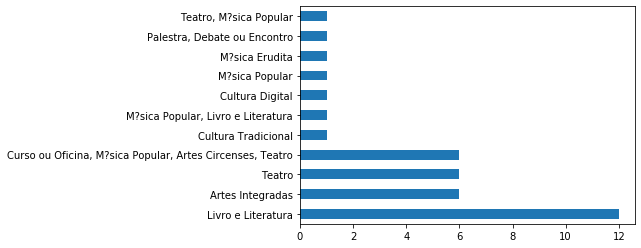

In [55]:
df_vilaCemAutom['Linguagem'].value_counts().plot.barh()

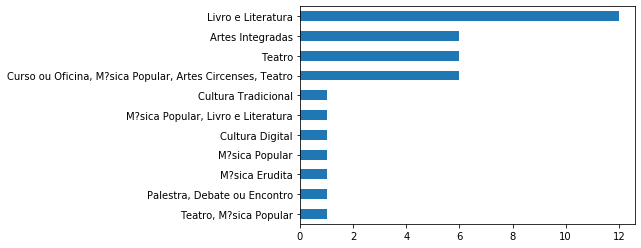

In [76]:
# Melhorar o gráfico de barras horizontal
# Para reverter a ordem do gráfico (colocar do maior para o menor)
df_vilaCemAutom['Linguagem'].value_counts(ascending=True).plot.barh()

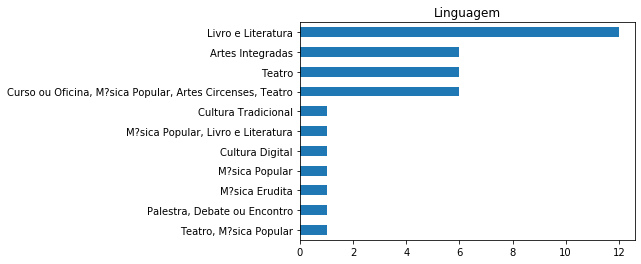

In [78]:
# Agora, acrescentando um título
df_vilaCemAutom['Linguagem'].value_counts(ascending=True).plot.barh(title='Linguagem')

In [ ]:
# Para poder selecionar por número da coluna ou campo específico
# loc, iloc = procura por índice e número da coluna
# at = com o comando at 
# Pesquisar isso.

In [75]:
# Podemos subdividir ou fatiar o DataFrame com base em pedaço de palavra
# df_hospbase[df_hospbase['Procedimento'].str.contains('Amputa')].count()

# Podemos subdividir ou fatiar o DataFrame com base em pedaço de palavra
df_filtrocolunas[df_filtrocolunas['Linguagem'].str.contains('Teatro')].count()
# VER MELHOR ESSE DADO. PARECE-ME QUE O RESULTADO NÃO DEVERIA SER ESSE.

Atividade                   203
Classificação Indicativa    203
Linguagem                   203
Preço                       185
Data inicial                203
Frequência                  195
Local                       200
Endereço                    194
Número                      194
dtype: int64

In [79]:
# Isso aqui é análise exploratória de dados
# É importante de ser feita.

### Usando o Plotly

##### Gráfico de dispersão (Scatter plot)
Para criar um scatter plot nós utilizaremos o código abaixo. A variável trace irá armazenar o objeto do gráfico, que criaremos utilizando a função go.Scatter(). Dentro dessa função iremos passar os argumentos para geração do gráfico, como os eixos X e Y. No argumento mode iremos passar a forma como queremos que os pontos do gráfico sejam representados — já, já voltaremos nesse argumento.
A variável data irá armazenar trace na forma de uma lista. Para exibir um gráfico no Plotly, é necessário passar tudo na forma de uma lista. Você poderia simplesmente utilizar [trace] dentro de py.iplot(), mas é uma boa prática passar dentro da variável data, mas a frente você verá o por quê.
Por fim, a função py.iplot(data) irá exibir o gráfico, que você pode ver o resultado abaixo:

In [38]:
trace = go.Scatter(x = df_filtrocolunas['Atividade'],
                   y = df_filtrocolunas['Preço'],
                   mode = 'markers')
data = [trace]
py.iplot(data)

###### Aprimorando seus gráfico
Títulos, subtítulos e lasers!
Plotly permite que você customize seus gráficos a nível quase atômico. Você pode mudar cores, formas, adicionar títulos, subtítulos, labels e até alterar cores de fundo e fontes (tamanho, família, etc.). Não irei cobrir tudo aqui nesse post, pois daria pra fazer uma coletânea com eles, mas irei pavimentar o caminho para que você explore todas as possibilidades.
Primeiro, se quiser saber as coisas que um tipo de gráfico suporta — como o scatter plot — , você pode utilizar o comando go.Scatter().help() para saber os argumentos que ela tem. Você pode fazer isso para todos os gráficos, como go.Pie() ou go.Bar(). Você também pode acessar a documentação do Plotly e investigar, mas já vou avisando que o site de documentação dele é mais feio que bater em mãe.

###### Adicionando títulos e rótulos
Para adicionar um título ao gráfico acima, nós iremos utilizar mais duas linhas de código. A primeira é a variável layout, que irá abrigar a função go.Layout(). Confira a documentação para ver o que ela suporta. A função Layout suporta argumentos como título e rótulos no eixo X e Y, mas ela vai muito além disso. Através dessa função você pode mudar cores, fonte, tamanho do gráfico e mais uma cacetada de coisas.
A segunda variável será fig, que irá armazenar um objeto de figura. Esse objeto é o que será exibido como gráfico, e como argumento você passa os dados que quer plotar e o layout que quer utilizar.

In [28]:
go.Scatter().help()

AttributeError: 'Scatter' object has no attribute 'help'

In [27]:
# Criando gráfico
trace = go.Scatter(x = df_filtrocolunas['Atividade'],
                   y = df_filtrocolunas['Linguagem'],
                   mode = 'markers')
# Armazenando gráfico em uma lista
data = [trace]
# Criando Layout
layout = go.Layout(title='Relação Atividade por Linguagem',
                   yaxis={'title':'Linguagem'},
                   xaxis={'title': 'Atividade'})
# Criando figura que será exibida
fig = go.Figure(data=data, layout=layout)
# Exibindo figura/gráfico
py.iplot(fig)

###### Alterando cores do gráfico
Cor sim, cor não
Ainda trabalhando no gráfico acima, podemos customizá-lo alterando suas cores e até espessura das linhas de contorno, utilizando o argumento marker. Também utilizaremos o argumento opacity, para deixar o gráfico um pouco menos opaco.

In [29]:
trace = go.Scatter(x = df_filtrocolunas['Atividade'],
                   y = df_filtrocolunas['Linguagem'],
                   mode = 'markers',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}},
                   opacity=.8)

data = [trace]
layout = go.Layout(title='Relação Atividade por Linguagem',
                   yaxis={'title':'Linguagem'},
                   xaxis={'title': 'Atividade'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Caso você tenha dúvida sobre quais cores utilizar nos seus gráficos, existem sites especializados em criação de paleta de cores para suas visualizações. Particulamente gosto muito do Flat UI Colors e o Susielu

##### Criando um gráfico de caixa
What’s in the booooox?
Dentre seus diversos tipos de gráfico, Plotly permite que você crie boxplots, ou gráfico de caixas. Para construí-los é muito similar ao gráfico de dispersão, mas agora você utilizará a função go.Box().
No código abaixo, eu crio um gráfico de caixa para cada quantidade de quatros. Meu objetivo ver é como os preços de vendas são distribuídos entre casas com diversos tamanhos de quartos, de um a quatro. Para isso, eu tenho que criar uma variável trace para cada gráfico.
Se lembra que falei que é uma boa prática criar uma variável chamada data? Nesse caso abaixo vemos sua importância ao colocarmos todos os quatro gráficos dentro de uma lista. Utilizando os argumentos paper_bgcolor e plot_bgcolor, vou alterar a cor de fundo do gráfico.

In [30]:
# https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b
# Gerando gráficos para casas que tem 1 quarto
trace1 = go.Box(y = df.loc[df['bedrooms'] == 1, 'price'],
                name = 'Casas com 1 quarto',
                marker = {'color': '#f39c12'})
# Gráfico de caixa para casas com 2 quartos
trace2 = go.Box(y = df.loc[df['bedrooms'] == 2, 'price'],
                name = 'Casas com 2 quartos',
                marker = {'color': '#e67e22'})
# Gráfico de caixa para casas com 3 quartos
trace3 = go.Box(y = df.loc[df['bedrooms'] == 3, 'price'],
                name = 'Casas com 3 quartos',
                marker = {'color': '#d35400'})
# Gráfico para casas de quatro quartos
trace4 = go.Box(y = df.loc[df['bedrooms'] == 4, 'price'],
                name = 'Casas com 4 quartos',
                marker = {'color': '#e74c3c'})
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title = 'Dispersão de preços para casas com diferentes quartos',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Número de quartos'},
                   yaxis = {'title': 'Preço'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

KeyError: 'bedrooms'

##### Criando gráficos de linha
Um detalhe interessante sobre o Plotly é que gráfico de linha nada mais é que um gráfico de dispersão, mas onde os pontos são conectados por linhas. Deixando nosso dataset um pouco de lado, todos os três gráficos abaixo foram criandos utilizando a função go.Scatter(), onde a única diferença é o argumento mode. Confira abaixo:

In [31]:


# Gráfico usando apenas marcadores
trace1 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [1, 2, 3, 4, 5],
                    mode = 'markers',
                    name = 'Apenas marcadores')
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [11, 12, 13, 14, 15],
                    mode = 'lines',
                    name = 'Apenas linhas')
# Criando gráfico com marcadores e linhas
trace3 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [6, 7, 8, 9, 10],
                    mode = 'markers+lines',
                    name = 'Marcadores e Linhas')
data = [trace1, trace2, trace3]
py.iplot(data)

Maneiro, né? Assim como podemos mudar o modo como os pontos são conectados, podemos mudar até o tracejado das linhas. Dá uma olhada:

In [32]:
# Gráfico usando apenas marcadores
trace1 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [10, 9, 11, 8, 12],
                    mode = 'lines',
                    name = 'Gráfico com linhas tracejadas',
                    line = {'color': '#ee5253',
                            'dash': 'dash'})
# Gráfico de apenas linhas
trace2 = go.Scatter(x = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio'],
                    y = [11, 12, 13, 14, 15],
                    mode = 'lines',
                    name = 'Gráfico com linha pontilhada',
                    line = {'color': '#341f97',
                            'dash': 'dot'})
data = [trace1, trace2]
py.iplot(data)

Poderia ficar o dia todo aqui falando sobre as customizações do Plotly — mas não vou — , mas vou deixar aqui a documentação da função go.Scatter() e essa página bem didática do Plotly sobre gráficos de linha.

##### Criando gráfico de barras
Igual gráfico de linhas, só que com barras
Você irá perceber que poucas coisas mudam de um gráfico para outro. Para criar um gráfico de barras no Plotly, usaremos a função go.Bar().

In [ ]:
trace = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
               y = [10, 20, 30])
data = [trace]
py.iplot(data)

##### Múltiplos gráfico de barras
Semelhante a como criamos vários boxplots, podemos criar vários gráficos de barras, que serão colocados lado a lado de acordo com o eixo X:

In [ ]:
trace1 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [10, 20, 30])
trace2 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [20, 30, 40])
data = [trace1, trace2]
py.iplot(data)

##### Customizando gráfico de barras
Assim como podemos mudar cores e nomes de gráficos de dispersão e linha, podemos alterar bar plots também. O código abaixo é igual ao acima, mas mudaremos o nome dos gráficos — ao invés de ficar trace 0 ou trace 1 — e iremos alterar suas cores:

In [ ]:
trace1 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [10, 20, 30],
                name = 'Gráfico 1',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [20, 30, 40],
                name = 'Gráfico 2',
                marker = {'color': '#ff9f43'})
data = [trace1, trace2]
py.iplot(data)

##### Empilhando barras (Stacked Bar)
Se nós quisermos fazer um gráfico de barras empilhado — Stacked Bar Plot — , basta adicionar o argumento barmode na função go.Layout().

In [ ]:
trace1 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [10, 20, 30],
                name = 'Gráfico 1',
                marker = {'color': '#feca57'})
trace2 = go.Bar(x = ['Banana', 'Maçã', 'Uva'],
                y = [20, 30, 40],
                name = 'Gráfico 2',
                marker = {'color': '#ff9f43'})
data = [trace1, trace2]
layout = go.Layout(title = 'Gráfico de barras do <a href=\'https://plot.ly/\'>Plotly</a>',
                   xaxis = {'title': 'Nome da fruta'},
                   yaxis = {'title': 'Quantidade'},
                   barmode = 'stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

##### Criando um gráfico com mapas
Plotly também tem suporte a dados geoespaciais, como cloropleth e mapas de calor. Abaixo, vou ensinar você criar um ScatterGeo plot, ou seja, um gráfico de dispersão sobre um mapa.
Para isso, utilizaremos um dataset que contém o informações populacionais sobre cidades americanas. Confira abaixo as primeiras linhas do arquivo:

In [ ]:
df_cities = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df_cities.head()

Para criarmos um gráfico de mapa, precisaremos de dados geospaciais, como latitude e longitude e, felizmente, nós temos isso em nosso DataFrame.
No código abaixo iremos criar nosso ScatterGeo utilizando a função go.Scattergeo:

In [ ]:
trace = go.Scattergeo(
                     locationmode = 'USA-states',
                     lon = df['lon'],
                     lat = df['lat'],
                     text = df['name'] + '- População: ' + df['pop'].astype(str),
                     marker = dict(
                            size = df['pop']/5000,
                            color = '#e74c3c',
                            line = {'width': 0.5, 
                                    'color': '#2c3e50'},
                            sizemode = 'area')
                    )
data = [trace]
layout = go.Layout(
        title = '<b>População americana em 2014</b>',
        titlefont = {'family': 'Arial',
                     'size': 24},
        geo =  {'scope': 'usa',
                'projection': {'type': 'albers usa'},
                'showland': True,
                'landcolor': '#2ecc71',
                'showlakes': True,
                'lakecolor': '#3498db',
                'subunitwidth': 1,
                'subunitcolor': "rgb(255, 255, 255)"
                })
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

E aí, curtiu os gráficos gerados pelo Plotly? Sentiu falta de algum? Todo o código gerado nesse tutorial está no notebook que gerei no Google Colab: um Google Docs com Jupyter Notebook feito pela Google. Se quiser ser meu amiguinho, me segue lá no Twitter e Linkedin pra ficar sabendo de mais conteúdo de dataviz. Até a próxima!